<a href="https://colab.research.google.com/github/Sinudeshmukh/Data-Science/blob/main/ForecastingAssgn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Airlines = pd.read_excel('Airlines+Data.xlsx')

In [ ]:
Airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


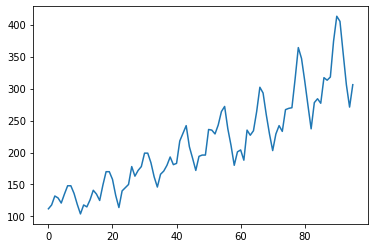

In [ ]:
Airlines.Passengers.plot()

##Creating Columns of Date,Month and Year

In [ ]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas
Airlines['Date'] = pd.to_datetime(Airlines.Month,format="%b-%y")

Airlines['month'] = Airlines.Month.dt.strftime("%b")  #Month Extraction
Airlines['Year'] = Airlines.Month.dt.strftime("%Y")   #Year Extraction

##One Hot Encoding for For all Months to Predict Seasonality

In [ ]:
Airlines1 = pd.get_dummies(Airlines)

In [ ]:
Airlines1.head()

,Month,Passengers,Date,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,Year_1995,Year_1996,Year_1997,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002
0,1995-01-01,112,1995-01-01,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1995-04-01,129,1995-04-01,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
Airlines1['Year'] = Airlines.Month.dt.strftime("%Y")   #Year Extraction

###Creating timespan column 

In [ ]:
Airlines1['Time'] = range(1,len(Airlines)+1)

##Creating Log and Square columns for Models

In [ ]:
Airlines1['log_passengers'] = np.log(Airlines['Passengers'])

In [ ]:
Airlines1['T_square'] = np.square(Airlines1['Time'])

In [ ]:
Airlines1.head()

,Month,Passengers,Date,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,Year_1995,Year_1996,Year_1997,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year,Time,log_passengers,T_square
0,1995-01-01,112,1995-01-01,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1995,1,4.718499,1
1,1995-02-01,118,1995-02-01,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1995,2,4.770685,4
2,1995-03-01,132,1995-03-01,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1995,3,4.882802,9
3,1995-04-01,129,1995-04-01,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1995,4,4.859812,16
4,1995-05-01,121,1995-05-01,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1995,5,4.795791,25


##Heatmap

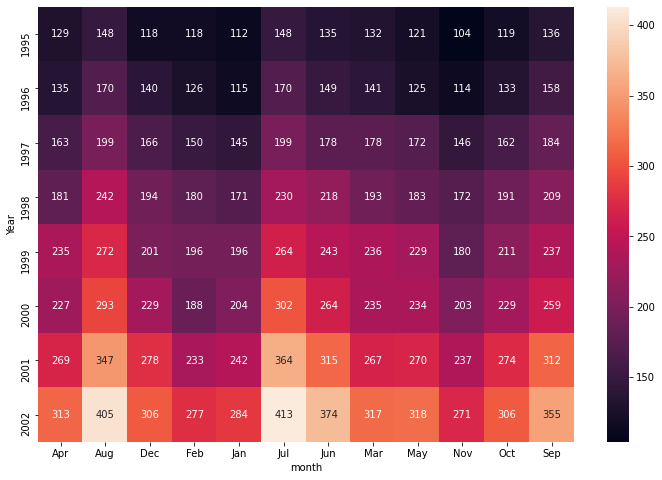

In [ ]:
plt.figure(figsize=(12,8))
heatmap_year = pd.pivot_table(data=Airlines,values='Passengers',index='Year',columns='month',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap_year,annot=True,fmt='g')

###We can see from Heatmap that in 90's there were less passengers travelling through Airlines and seasionality was also a parameter that was affecting but after 2000 we can see a drastic rise in Passengers

##BoxPlot

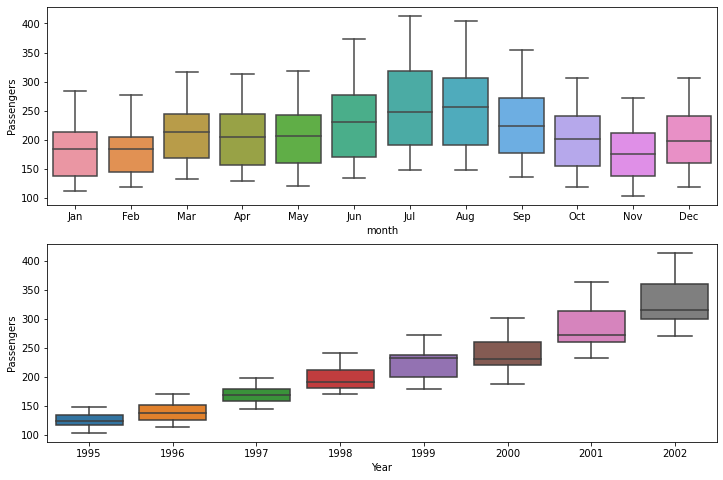

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(211)
sns.boxplot(x='month',y='Passengers',data=Airlines)
plt.subplot(212)
sns.boxplot(x='Year',y='Passengers',data=Airlines)

###We can see that from Boxplot that as the years move on Number of Passengers travelling in Airlines also increases

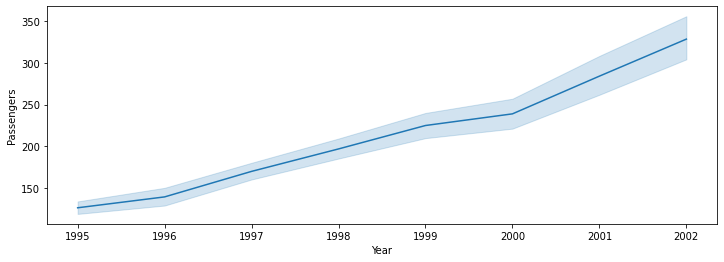

In [ ]:
plt.figure(figsize=(12,4))
sns.lineplot(x='Year',y='Passengers',data=Airlines)

##Spliting data for test and train

In [ ]:
train = Airlines1.head(84)
test = Airlines1.tail(12)

In [ ]:
train

,Month,Passengers,Date,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,Year_1995,Year_1996,Year_1997,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year,Time,log_passengers,T_square
0,1995-01-01,112,1995-01-01,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1995,1,4.718499,1
1,1995-02-01,118,1995-02-01,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1995,2,4.770685,4
2,1995-03-01,132,1995-03-01,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1995,3,4.882802,9
3,1995-04-01,129,1995-04-01,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1995,4,4.859812,16
4,1995-05-01,121,1995-05-01,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1995,5,4.795791,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2001-08-01,347,2001-08-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2001,80,5.849325,6400
80,2001-09-01,312,2001-09-01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2001,81,5.743003,6561
81,2001-10-01,274,2001-10-01,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2001,82,5.613128,6724
82,2001-11-01,237,2001-11-01,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2001,83,5.468060,6889


In [ ]:
test

,Month,Passengers,Date,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,Year_1995,Year_1996,Year_1997,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year,Time,log_passengers,T_square
84,2002-01-01,284,2002-01-01,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2002,85,5.648974,7225
85,2002-02-01,277,2002-02-01,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2002,86,5.624018,7396
86,2002-03-01,317,2002-03-01,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2002,87,5.758902,7569
87,2002-04-01,313,2002-04-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2002,88,5.746203,7744
88,2002-05-01,318,2002-05-01,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2002,89,5.762051,7921
89,2002-06-01,374,2002-06-01,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2002,90,5.924256,8100
90,2002-07-01,413,2002-07-01,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2002,91,6.023448,8281
91,2002-08-01,405,2002-08-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2002,92,6.003887,8464
92,2002-09-01,355,2002-09-01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2002,93,5.872118,8649
93,2002-10-01,306,2002-10-01,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2002,94,5.723585,8836


##Linear Model

In [ ]:
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~Time',data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['Time'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480278

##Exponential Model

In [ ]:
Exp = smf.ols('log_passengers~Time',data=train).fit()
pred_exp = pd.Series(Exp.predict(pd.DataFrame(test['Time'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

46.05736110315654

##Quadratic Model

In [ ]:
Quad = smf.ols('Passengers~Time+T_square',data=train).fit()
pred_quad = pd.Series(Quad.predict(test[['Time','T_square']]))
rmse_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_quad))**2))
rmse_quad

48.051888979330926

##Additive Seasonality

In [ ]:
add_sea = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=train).fit()
pred_add_sea= pd.Series(add_sea.predict(test[['month_Jan',"month_Feb","month_Mar","month_Apr","month_May","month_Jun","month_Jul","month_Aug","month_Sep","month_Oct","month_Nov"]]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421817

####As we can see that RMSE is increased using additive seasonality so we need to try Multiplicative seasonality

##Multiplicative Seasonality

In [ ]:
mul_sea = smf.ols('log_passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(test))
rmse_mul_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea

140.06320204708635

##Multiplicative additive Seasonality

In [ ]:
mul_add_sea = smf.ols('log_passengers~Time+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=train).fit()
pred_mul_add_sea=pd.Series(mul_sea.predict(test))
rmse_mul_add_sea= np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_add_sea

10.519172544323965

###We can see that multiplicative additive seasonality has least rmse value 

##Creating Dataframe for all RMSE values

In [ ]:
data = {"MODEL":pd.Series(['rmse_linear','rmse_exp','rmse_quad','rmse_add_sea','rmse_mul','rmse_mul_add_sea']),"RMSE_VALUE":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_mul_sea,rmse_mul_add_sea])}
RMSE_MODELS = pd.DataFrame(data)
RMSE_MODELS

,MODEL,RMSE_VALUE
0,rmse_linear,53.199237
1,rmse_exp,46.057361
2,rmse_quad,48.051889
3,rmse_add_sea,132.819785
4,rmse_mul,140.063202
5,rmse_mul_add_sea,10.519173


In [ ]:
RMSE_MODELS.sort_values(by='RMSE_VALUE')

,MODEL,RMSE_VALUE
5,rmse_mul_add_sea,10.519173
1,rmse_exp,46.057361
2,rmse_quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
4,rmse_mul,140.063202


##We can see that Multiplicative Additive Seasonality model gives us the best rmse value so we can choose this model for predicting Airlines Passengers